In [4]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from kmodes.kmodes import KModes
# First load the data to get the column names
df = pd.read_csv('defunciones.csv')

# Get a list of all column names
cols = df.columns.tolist()

# Create a dictionary with all columns set to str
col_types = {col: str for col in cols}

# Set 'Añoreg' to int
col_types['Añoreg'] = int
col_types['Edadif'] = int

# Reload the data with the correct dtypes
defunciones = pd.read_csv('defunciones.csv', dtype=col_types)

defunciones = defunciones[['Depocu', 'Mupocu', 'Sexo', 'Añoreg', 'Edadif', 'Perdif', 'Puedif', 'Escodif', 'Ciuodif', 'Caudef', 'Asist', 'Ocur']]

defunciones = defunciones.rename(columns={'Depocu': 'departamento', 'Mupocu': 'municipio', 'Sexo': 'sexo', 'Añoreg': 'año_registrado', 'Edadif': 'edad', 'Perdif': 'periodo', 'Puedif': 'etnia', 'Escodif': 'escolaridad', 'Ciuodif': 'ocupacion', 'Caudef': 'causa', 'Asist': 'asistencia', 'Ocur': 'lugar'})

# Order by year 
defunciones = defunciones.sort_values(by='año_registrado')

# Save the cleaned dataframe to a csv file
defunciones.to_csv('defunciones_clean.csv', index=False)

# convert floats to strings since they are categorical (except for año), remove leading and trailing whitespaces, and put most important categories first
for column in defunciones.columns:
    if column != 'año_registrado' and column != 'edad':
        defunciones[column] = defunciones[column].astype(str).str.strip()
        defunciones[column] = defunciones[column].astype('category')



/var/folders/g7/1ym58dj93f13x5_nxk6zr72m0000gn/T/ipykernel_68019/1586653056.py:7: DtypeWarning: Columns (18,28,29) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('defunciones.csv')


Las 10 causas de muerte más frecuentes:
                                               causa  count
0  Infarto agudo del miocardio, sin otra especifi...  61997
1                          Neumonía, no especificada  46809
2  Diabetes mellitus no especificada, sin mención...  33581
3                              Muerte sin asistencia  30327
4  Exposición a factores no especificados que cau...  25408
5  Otras causas mal definidas y las no especifica...  24835
6   Otras cirrosis del hígado y las no especificadas  24636
7                       COVID-19, virus identificado  21759
8                                          Senilidad  21304
9  Accidente vascular encefálico agudo, no especi...  17918
Tendencia de las principales causas de muerte:
causa           Infarto agudo del miocardio, sin otra especificación  \
año_registrado                                                         
2012                                                     0.219540      
2013                                 

<Figure size 1920x1440 with 0 Axes>

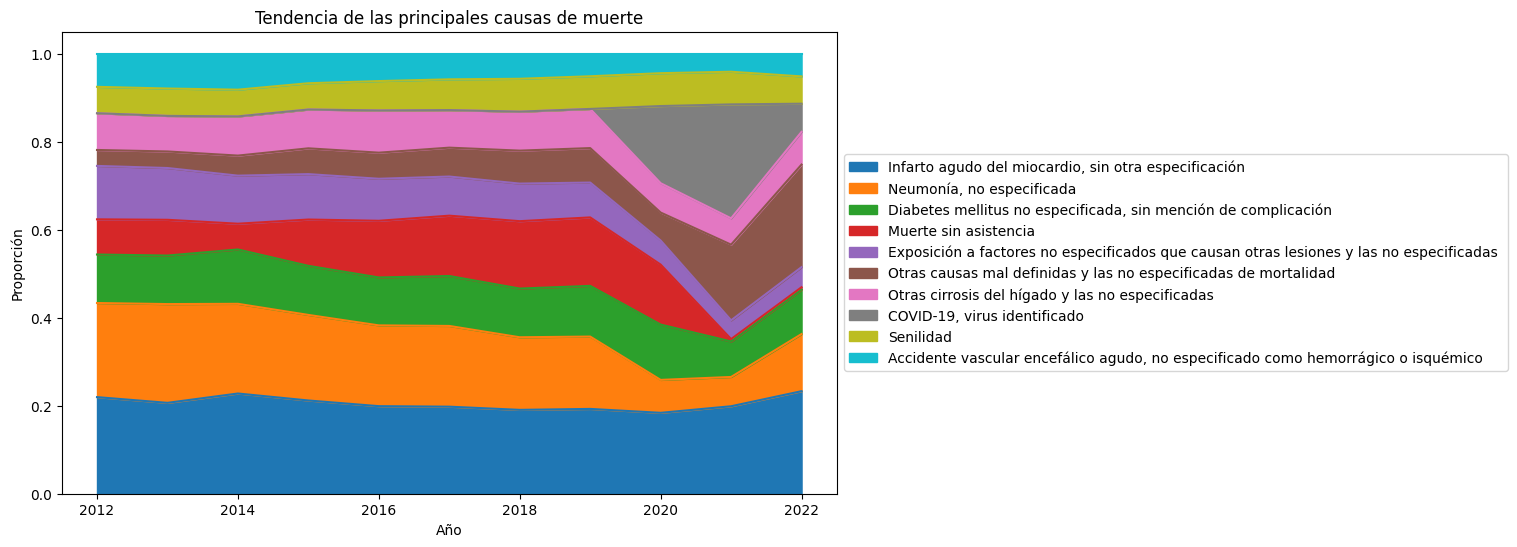

In [5]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the other table
cie = pd.read_csv('CIE.csv')

# ¿Cual ha sido la tendencia de las enfermedades más letales en los últimos 10 años?
df = defunciones.copy()

# Obtener las 10 causas de muerte más frecuentes
top_causas = df['causa'].value_counts().head(10).reset_index()
top_causas.columns = ['causa', 'count']

# Merge top_causas with cie to get the descriptions
top_causas = pd.merge(top_causas, cie, how='left', left_on='causa', right_on='codigo')

# Replace the 'causa' column with the 'descripcion' column
top_causas['causa'] = top_causas['descripcion']

# Drop the 'codigo' and 'descripcion' columns
top_causas = top_causas.drop(['codigo', 'descripcion'], axis=1)

print("Las 10 causas de muerte más frecuentes:")
print(top_causas)

# Replace 'causa' in df with 'descripcion' from cie
df = pd.merge(df, cie, how='left', left_on='causa', right_on='codigo')
df['causa'] = df['descripcion']
df = df.drop(['codigo', 'descripcion'], axis=1)

# Crear un DataFrame con las principales causas de muerte por año
df_tendencia = pd.crosstab(df['año_registrado'], df['causa'])
df_tendencia = df_tendencia[top_causas['causa'].values]

# Calcular la proporción de cada causa de muerte por año
df_tendencia_prop = df_tendencia.div(df_tendencia.sum(axis=1), axis=0)

print("Tendencia de las principales causas de muerte:")
print(df_tendencia_prop)

# Graficar la tendencia de las principales causas de muerte a lo largo de los años
plt.figure(dpi=300)
df_tendencia_prop.plot(kind='area', stacked=True, figsize=(10, 6))
plt.title('Tendencia de las principales causas de muerte')
plt.xlabel('Año')
plt.ylabel('Proporción')

# Move the legend to the right side of the plot
plt.legend(loc='center left', bbox_to_anchor=(1.0, 0.5))

plt.show()

/var/folders/g7/1ym58dj93f13x5_nxk6zr72m0000gn/T/ipykernel_68019/2418429683.py:6: FutureWarning: The behavior of Series.replace (and DataFrame.replace) with CategoricalDtype is deprecated. In a future version, replace will only be used for cases that preserve the categories. To change the categories, use ser.cat.rename_categories instead.
  defunciones['sexo'] = defunciones['sexo'].replace('1.0', 'Hombre')
/var/folders/g7/1ym58dj93f13x5_nxk6zr72m0000gn/T/ipykernel_68019/2418429683.py:8: FutureWarning: The behavior of Series.replace (and DataFrame.replace) with CategoricalDtype is deprecated. In a future version, replace will only be used for cases that preserve the categories. To change the categories, use ser.cat.rename_categories instead.
  defunciones['sexo'] = defunciones['sexo'].replace('2.0', 'Mujer')


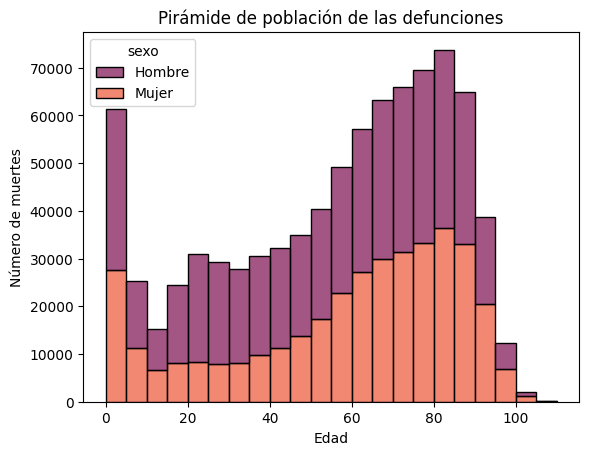

In [6]:
# Set the labels in Spanish
plt.xlabel('Edad')
plt.ylabel('Número de muertes')
plt.title('Pirámide de población de las defunciones')

defunciones['sexo'] = defunciones['sexo'].replace('1.0', 'Hombre')

defunciones['sexo'] = defunciones['sexo'].replace('2.0', 'Mujer')

# Plot the histogram
sns.histplot(data=defunciones[defunciones['edad'] <= 110], x='edad', hue='sexo', multiple='stack', bins=range(0, 111, 5), palette='rocket')

plt.show()


/var/folders/g7/1ym58dj93f13x5_nxk6zr72m0000gn/T/ipykernel_68019/2981377526.py:8: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df_grouped = df_filtered.groupby(['etnia', 'causa', 'ocupacion']).size().unstack(level=0)


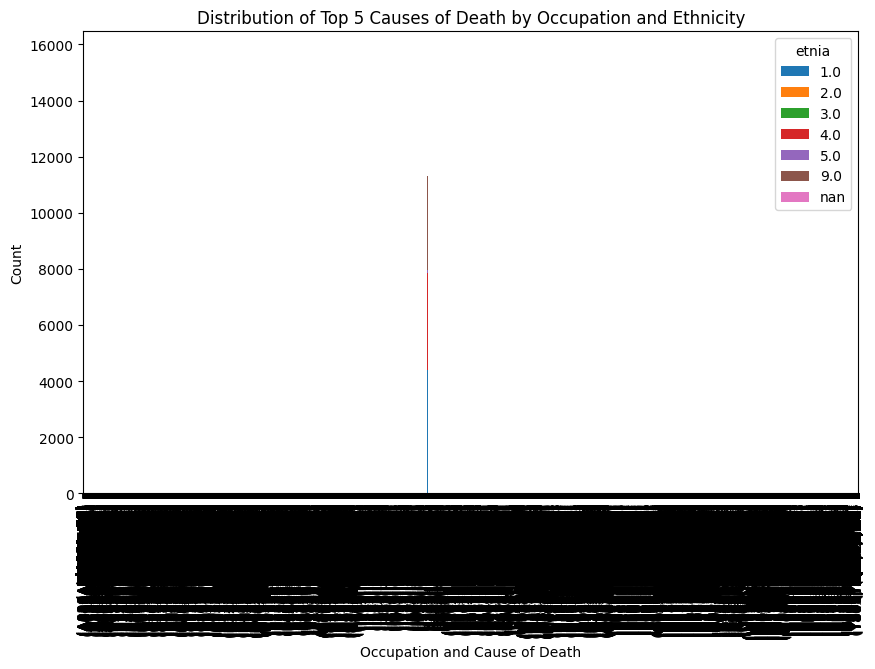

In [7]:
# Get the top 5 causes of death
top_causas = defunciones['causa'].value_counts().head(5).index

# Filter the DataFrame to include only the top 5 causes of death
df_filtered = defunciones[defunciones['causa'].isin(top_causas)]

# Group by 'etnia', 'causa', and 'ocupacion' and count the number of occurrences
df_grouped = df_filtered.groupby(['etnia', 'causa', 'ocupacion']).size().unstack(level=0)

# Plot the DataFrame as a stacked bar chart
df_grouped.plot(kind='bar', stacked=True, figsize=(10, 6))
plt.title('Distribution of Top 5 Causes of Death by Occupation and Ethnicity')
plt.xlabel('Occupation and Cause of Death')
plt.ylabel('Count')
plt.show()

In [8]:
import pandas as pd 
import numpy as np 


# Define the categorical columns
cat_columns = ['sexo', 'etnia', 'periodo', 'etnia', 'departamento']

# Randomly select 1000 rows from the DataFrame
defunciones_sample = defunciones.sample(n=100000, random_state=42)

# Ensure the categorical columns are of type 'category'
for column in cat_columns:
    defunciones_sample[column] = defunciones_sample[column].astype('category')

# Get the indices of the categorical columns
categorical_indices = [defunciones_sample.columns.get_loc(col) for col in cat_columns]

kmodes = KModes(n_clusters=5, verbose=0, random_state=42)
clusters = kmodes.fit_predict(defunciones_sample.iloc[:, categorical_indices])

print(clusters)

[0 4 3 ... 0 4 2]


Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 1, iteration: 1/100, moves: 0, cost: 3623585.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 1, iteration: 1/100, moves: 22720, cost: 3316134.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 1, iteration: 1/100, moves: 22465, cost: 3199694.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 1, iteration: 1/100, moves: 48383, cost: 3096860.0


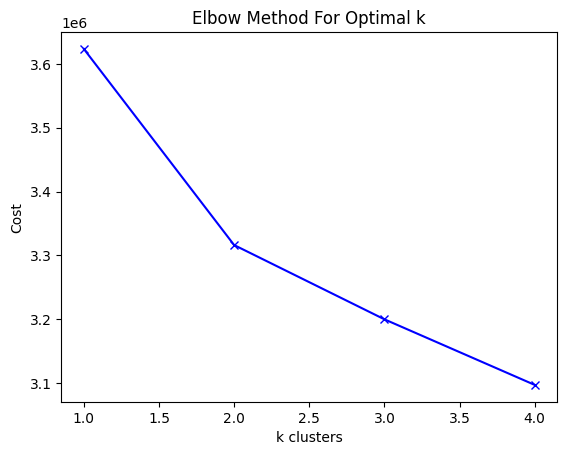

In [9]:
cat_columns = ['sexo', 'etnia', 'periodo', 'departamento','municipio','causa','ocupacion']
subset = defunciones[cat_columns]

cost = []
K = range(1,5)
for num_clusters in list(K):
    kmode = KModes(n_clusters=num_clusters, init = "Cao", n_init = 1, verbose=1)
    kmode.fit_predict(subset)
    cost.append(kmode.cost_)
    
plt.plot(K, cost, 'bx-')
plt.xlabel('k clusters')
plt.ylabel('Cost')
plt.title('Elbow Method For Optimal k')
plt.show()

In [10]:
from kmodes.kmodes import KModes
cat_columns = ['sexo', 'etnia', 'periodo', 'departamento','municipio','causa','ocupacion']
subset = defunciones[cat_columns]
k_optimo = 2
kmode_optimo = KModes(n_clusters=k_optimo, init="Cao", n_init=10, verbose=1)
clusters = kmode_optimo.fit_predict(subset)

defunciones_copy = defunciones.copy()

defunciones_copy['cluster'] = clusters

print(defunciones_copy.head())

Initialization method and algorithm are deterministic. Setting n_init to 1.
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 1, iteration: 1/100, moves: 22720, cost: 3316134.0
      departamento municipio    sexo  año_registrado  edad periodo etnia  \
0             17.0      1703  Hombre            2012    28     3.0   nan   
48145          1.0      0101   Mujer            2012    88     3.0   nan   
48146          1.0      0101   Mujer            2012    74     3.0   nan   
48147          1.0      0101   Mujer            2012    43     3.0   nan   
48148          1.0      0101   Mujer            2012    88     3.0   nan   

      escolaridad ocupacion causa asistencia lugar  cluster  
0             1.0       nan  M329        5.0   6.0        0  
48145         2.0       nan  E142        1.0   6.0        0  
48146         2.0       nan  E039        1.0   1.0        0  
48147         2.0       nan  E149        1.0   6.0        0  
48148         2.0     

In [11]:
import plotly.express as px

# Load the geojson file
import json
with open('guatemala.geojson') as f:
    geojson_guatemala = json.load(f)

fig = px.choropleth_mapbox(defunciones_copy, geojson=geojson_guatemala, locations='municipio', color='cluster',
                           mapbox_style='carto-positron', zoom=6, center={'lat': 15.7835, 'lon': -90.2308},
                           opacity=0.7, title='Distribución geográfica de los clústeres')
fig.show()

ModuleNotFoundError: No module named 'plotly'

/var/folders/g7/1ym58dj93f13x5_nxk6zr72m0000gn/T/ipykernel_26282/970502712.py:7: FutureWarning:

The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.



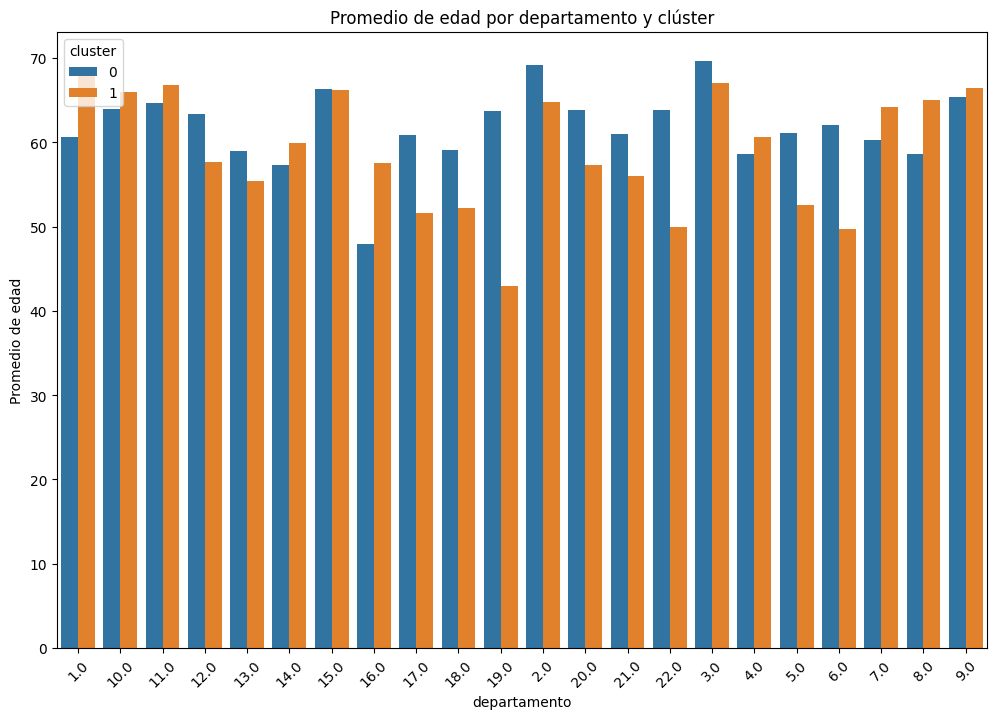